In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
import PIL  
from PIL import Image  
from google.colab.patches import cv2_imshow

In [6]:
image = cv.imread('colour_image.jpg')

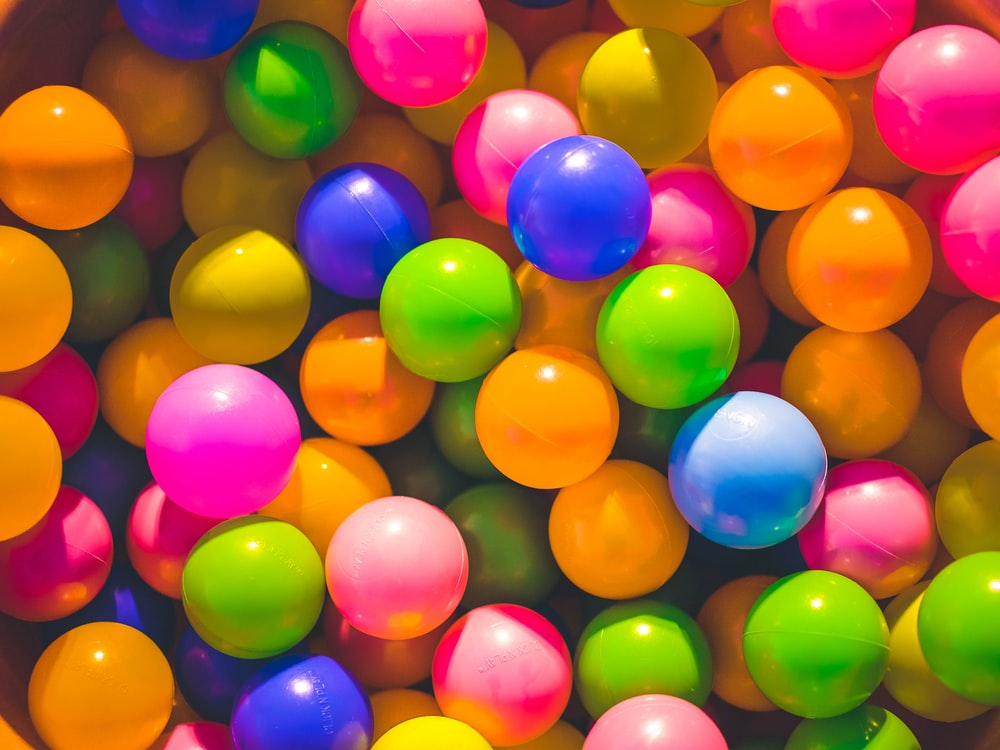

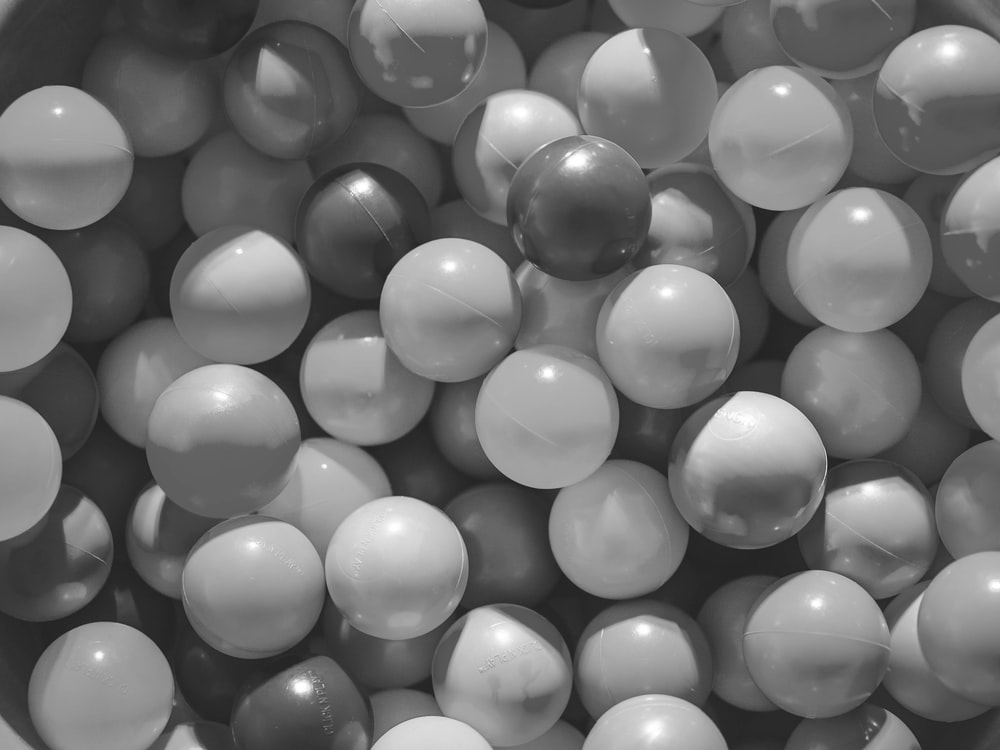

In [7]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image)
cv2_imshow(gray_image)

(750, 1000, 3)


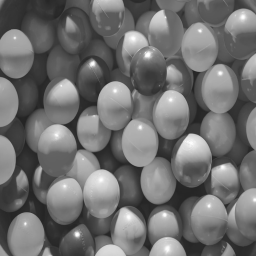

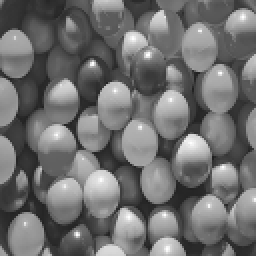

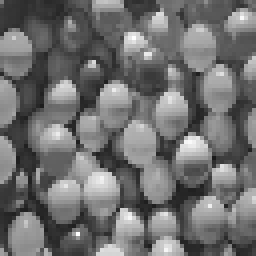

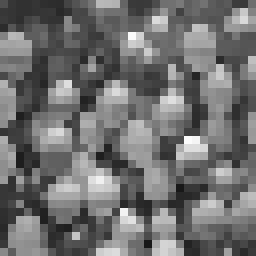

In [9]:
#Image Sampling

lenna = cv.imread('colour_image.jpg')
print(lenna.shape)
lenna = cv.cvtColor(lenna, cv.COLOR_BGR2GRAY)
lenna = cv.resize(lenna, (256,256), interpolation = cv.INTER_AREA)
res128 = cv.resize(lenna, None,fx= 0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
res64 = cv.resize(res128, (64,64), interpolation = cv.INTER_CUBIC)
res32 = cv.resize(res64, (32,32), interpolation = cv.INTER_CUBIC)

res128 = cv.resize(res128, (256,256), interpolation = cv.INTER_AREA)
res64 = cv.resize(res64, (256,256), interpolation = cv.INTER_AREA)
res32 = cv.resize(res32, (256,256), interpolation = cv.INTER_AREA)

cv2_imshow(lenna)

cv2_imshow(res128)

cv2_imshow(res64)

cv2_imshow(res32)

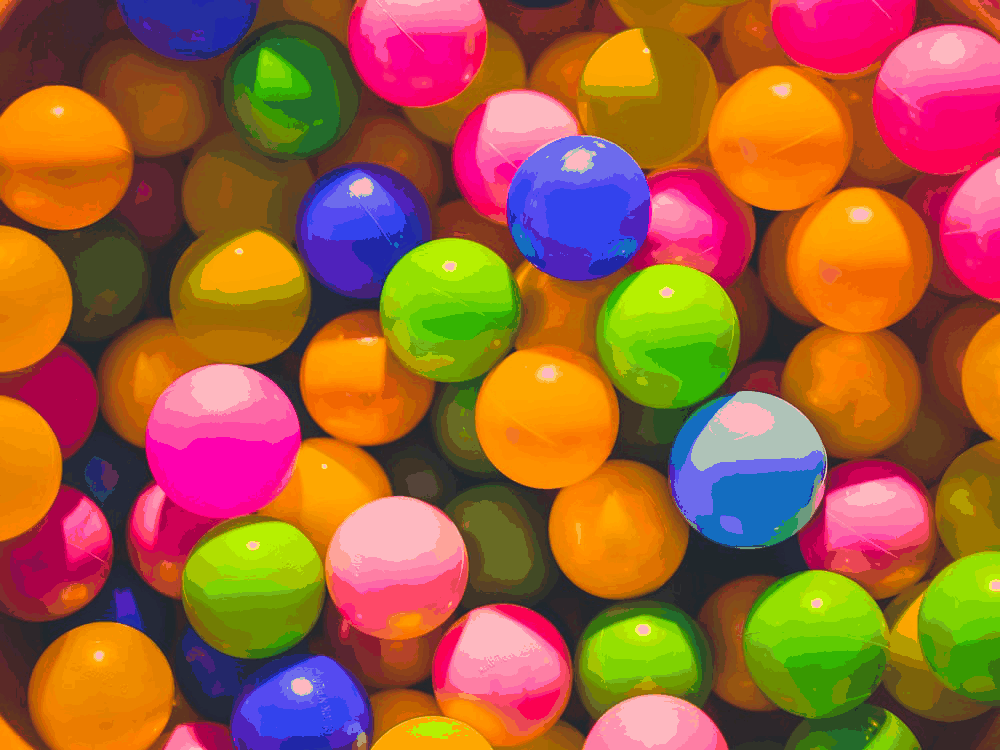

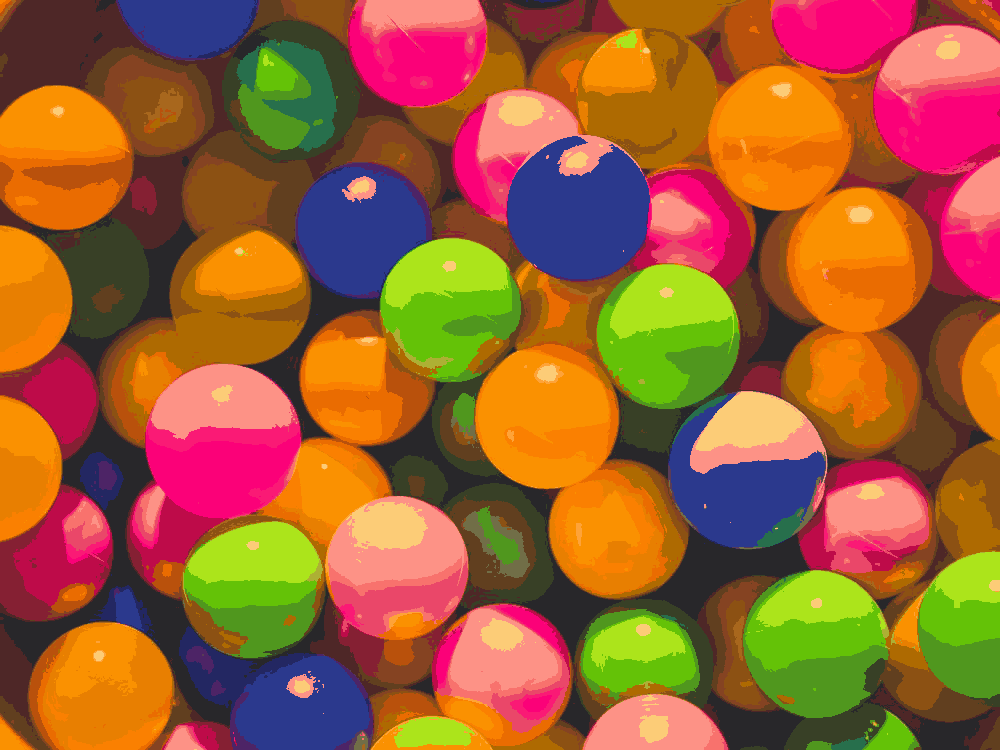

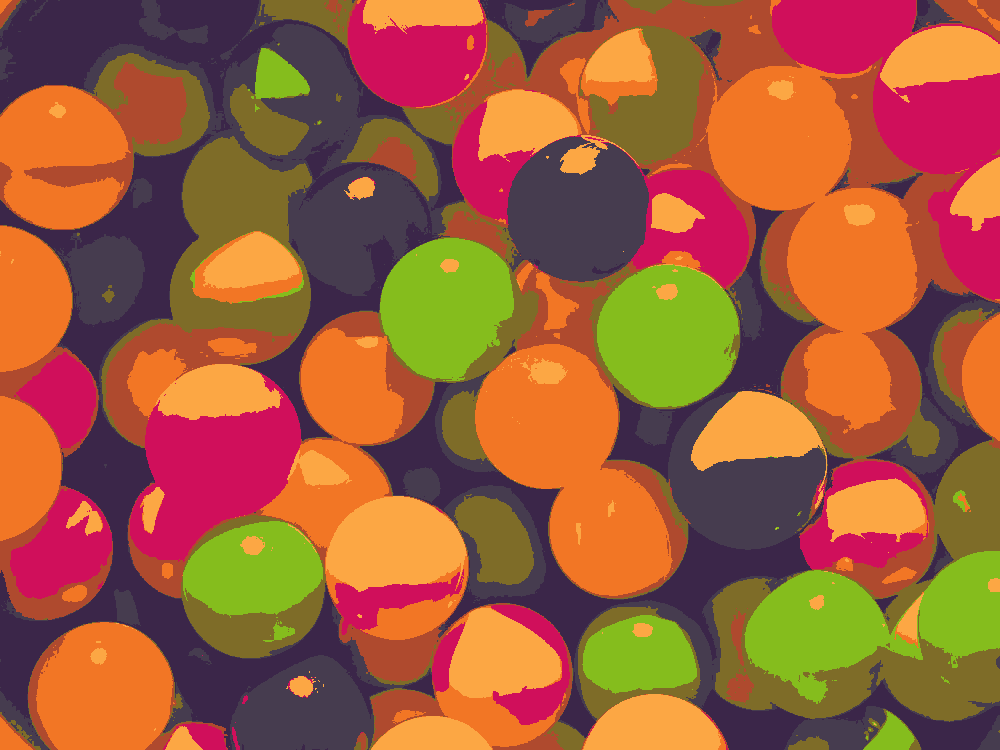

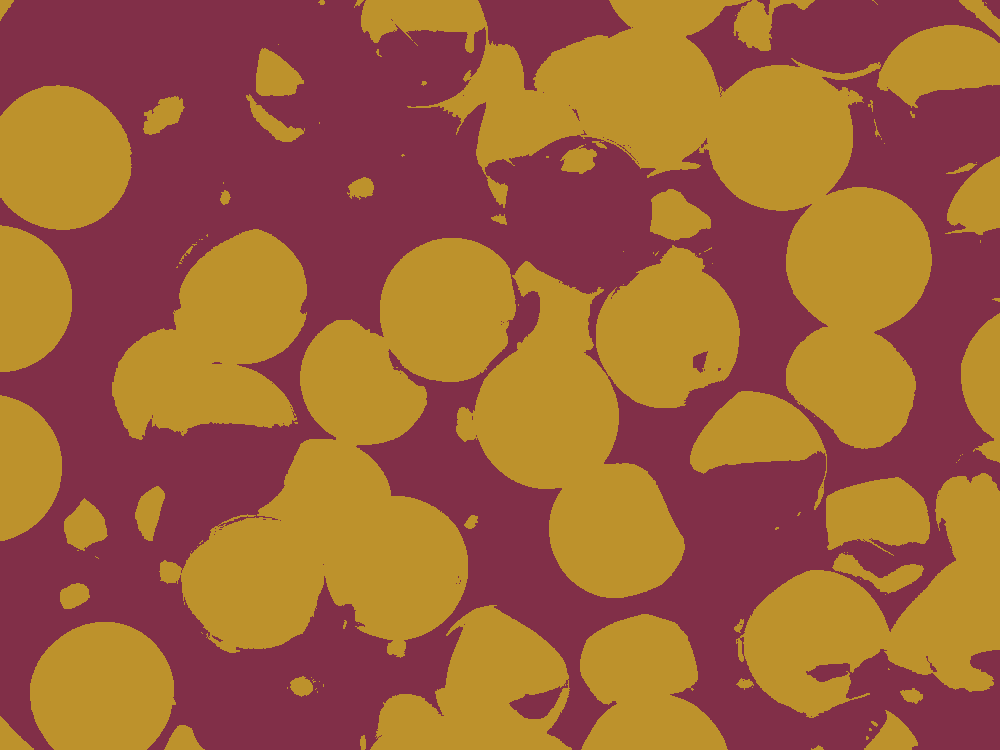

In [10]:
#Image Quantization

im1 = Image.open(r"colour_image.jpg")  
im128 = im1.quantize(128)
im32 = im1.quantize(32)
im8 = im1.quantize(8)
im2 = im1.quantize(2)  
display(im128)
display(im32)
display(im8)
display(im2)

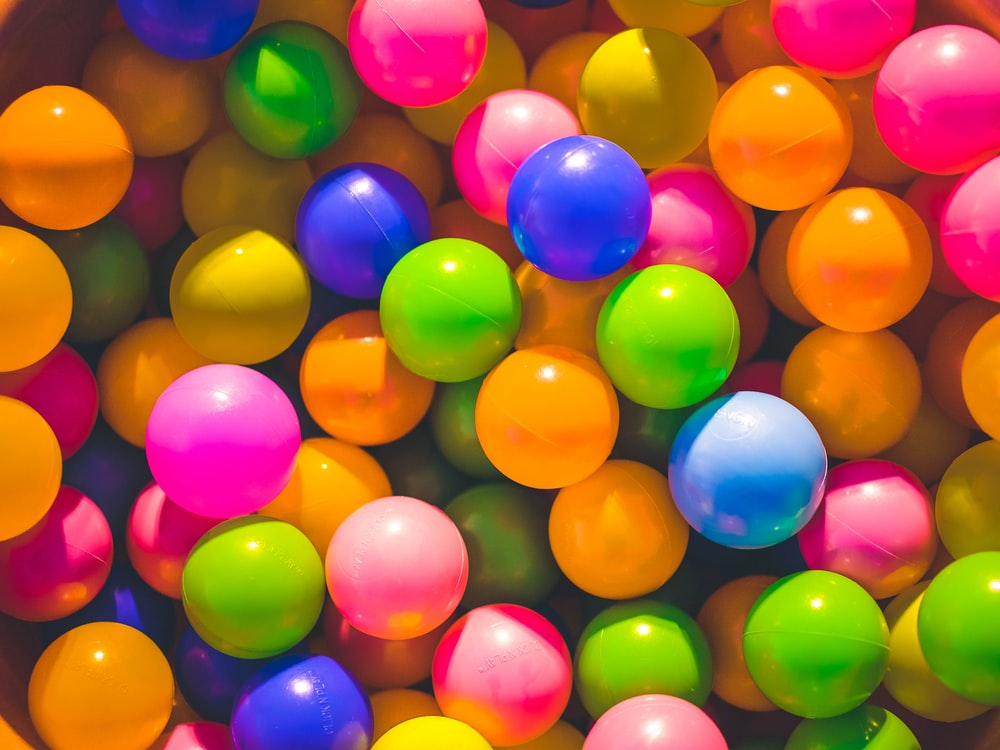

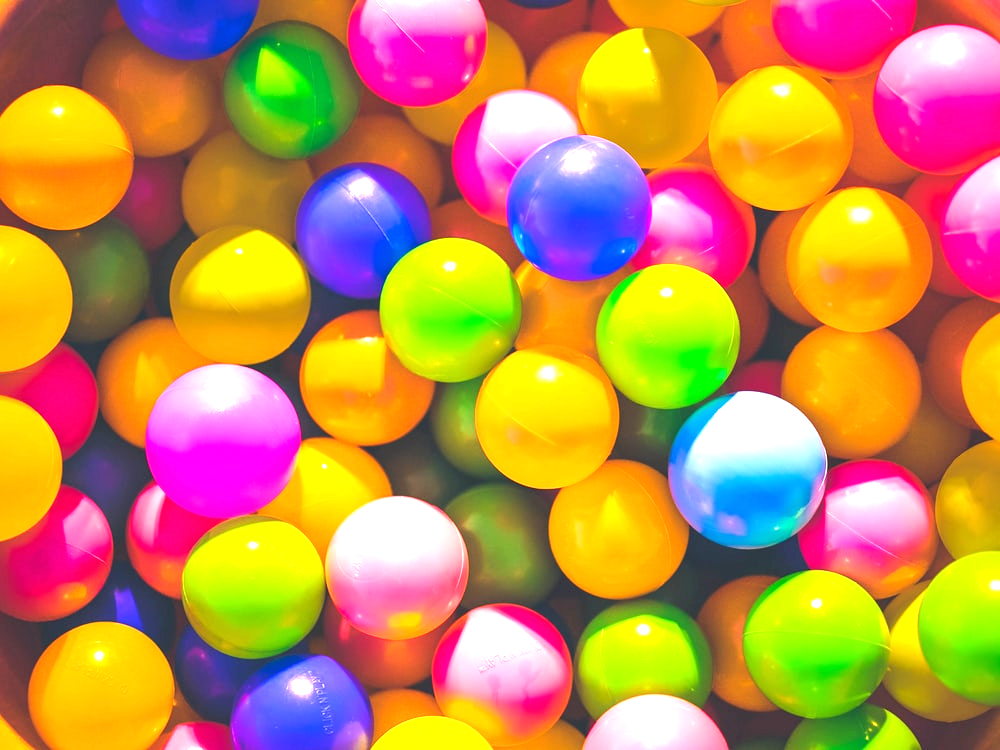

-1

In [11]:
#Image Enhancement
# Adjusted the brightness and contrast of image

alpha = 1.5 # Contrast control given in between (1.0-3.0)
beta = 0 # Brightness control given in between (0-100)

adjusted = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

cv2_imshow(image)
cv2_imshow(adjusted)
cv.waitKey()

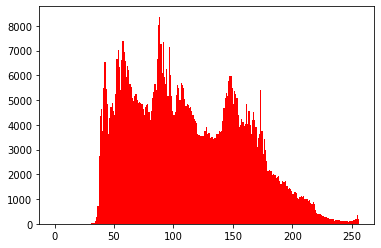

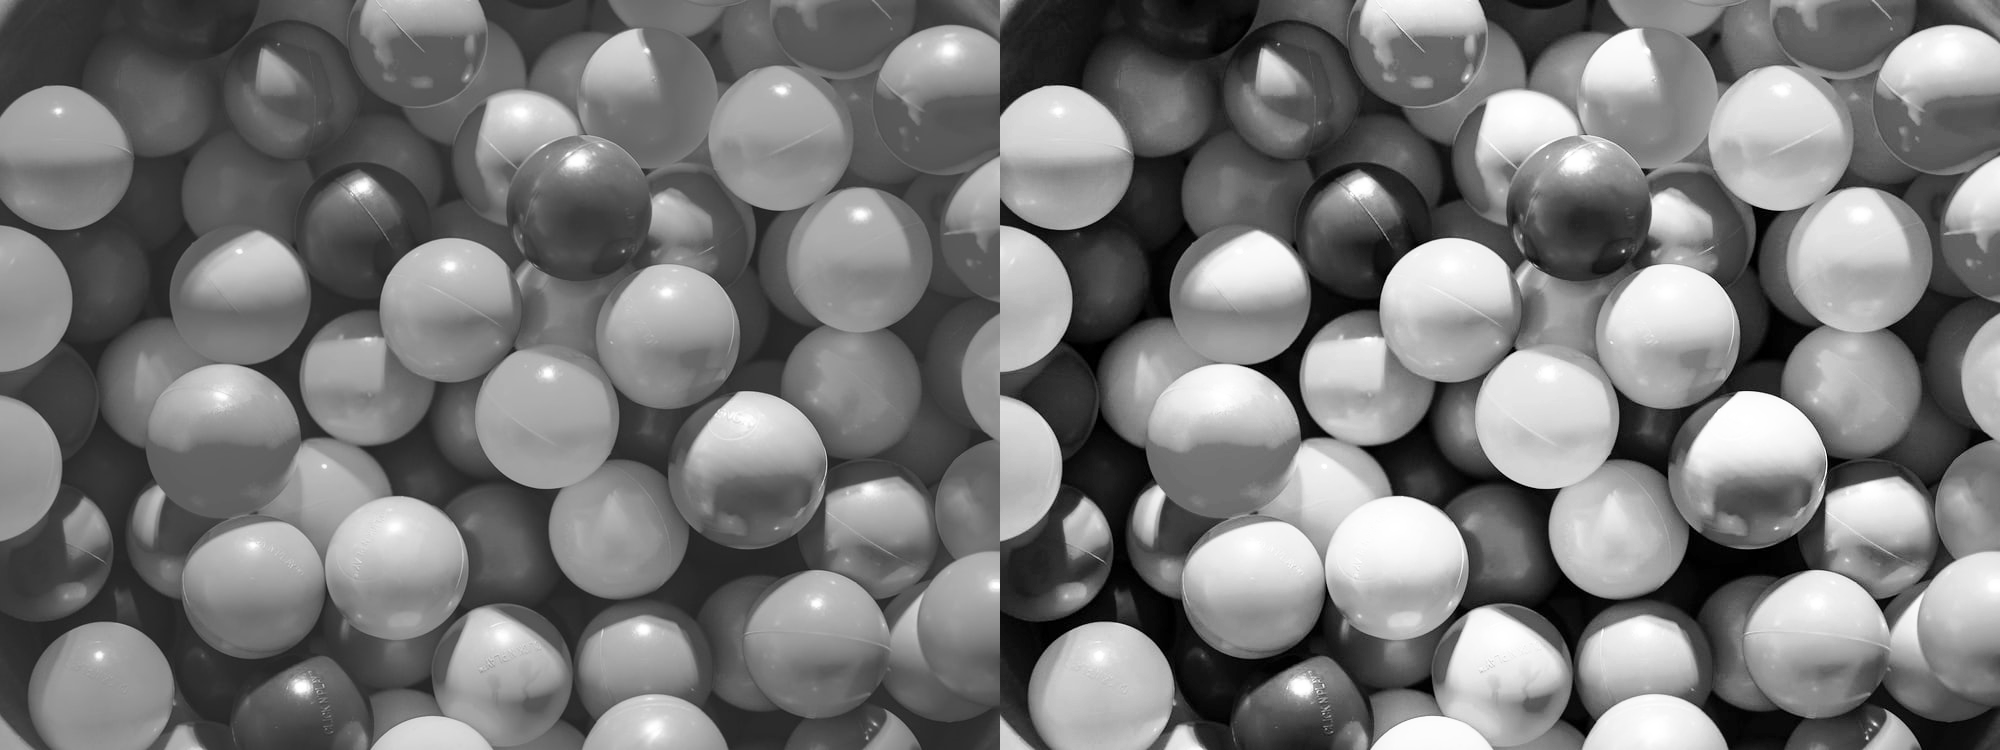

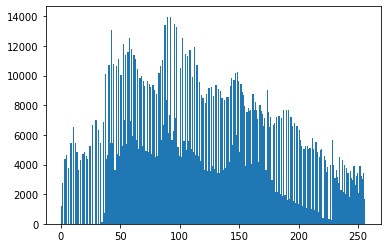

<Figure size 432x288 with 0 Axes>

In [12]:
#Histogram Equalization
img = gray_image
plt.savefig('hist.png')
plt.hist(img.ravel(),256,[0,256],color='r')
plt.show()
equ = cv.equalizeHist(img)
res = np.hstack((img,equ))

cv2_imshow(res)

plt.hist(res.ravel(),256,[0,256]) 

plt.show() 
plt.savefig('equal-hist.png')

In [13]:
#Smoothening the Image
#(a) Gaussian Filter
image = cv.imread('colour_image.jpg')

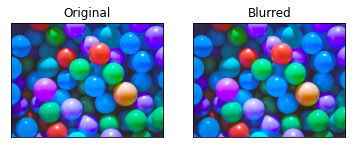

In [14]:
blur = cv.GaussianBlur(image,(5,5),0)
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

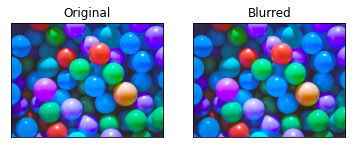

In [15]:
#Median Filter
median = cv.medianBlur(img,5)

plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

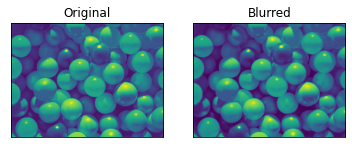

In [16]:
#Average Filtering

blur = cv.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

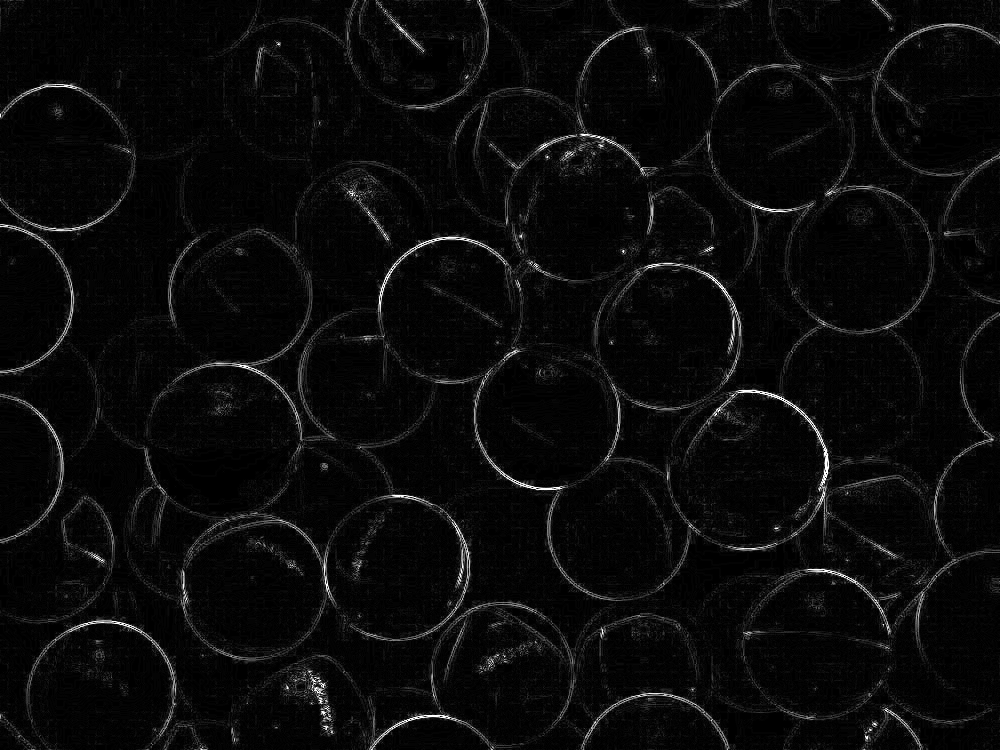

In [17]:
#Image with different laplacian masks
ddepth = cv.CV_16S
kernel_size = 3
dst = cv.Laplacian(gray_image, ddepth, ksize=kernel_size)
abs_dst = cv.convertScaleAbs(dst)
cv2_imshow(abs_dst)

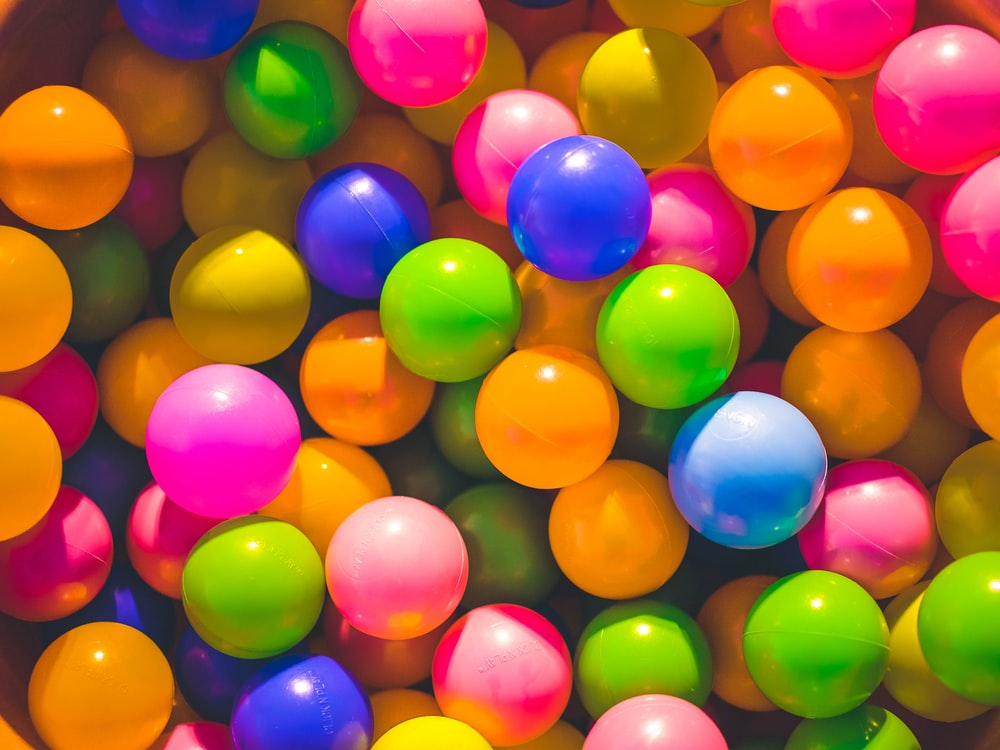

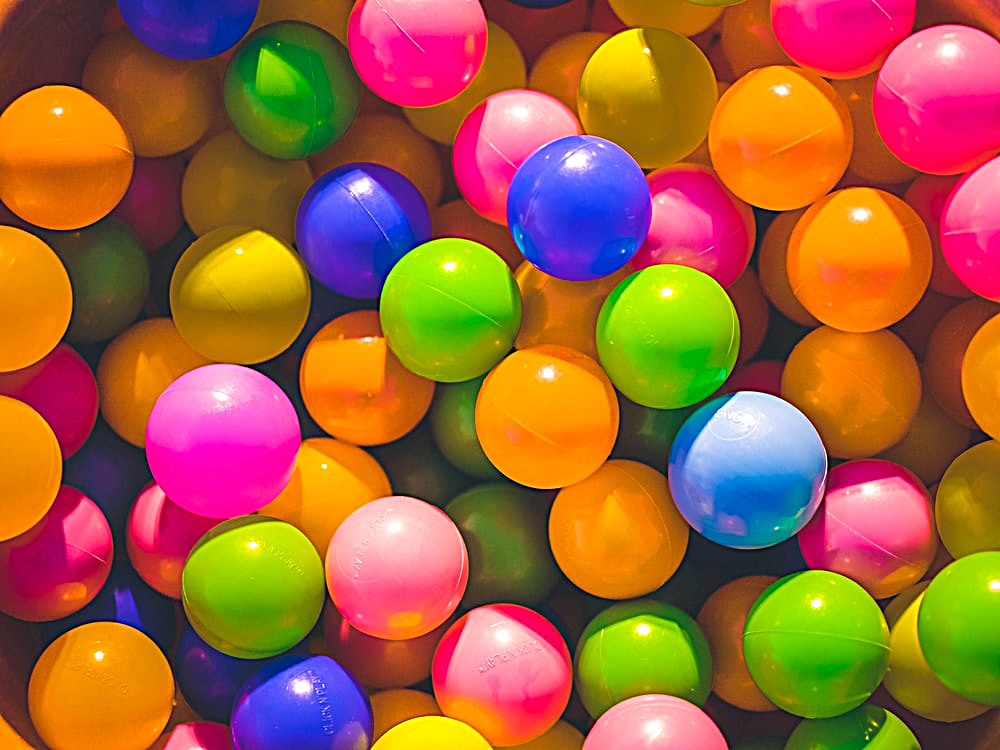

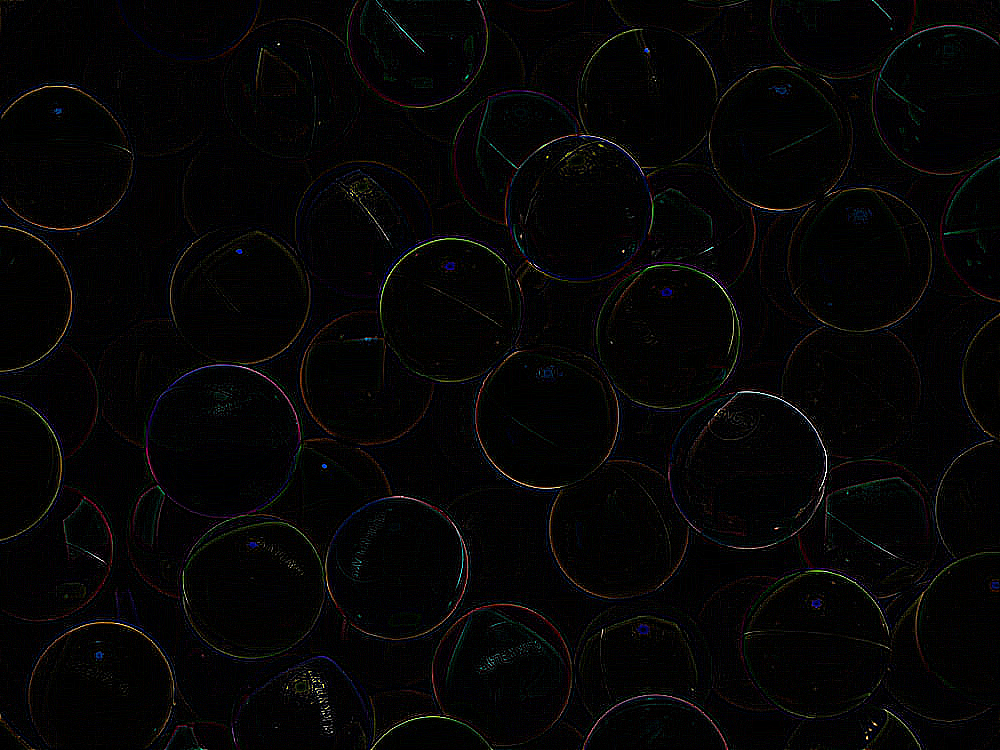

-1

In [19]:
#unsharp masking and high boost filtering
image = cv.imread("colour_image.jpg", cv.COLOR_BGR2GRAY)
cv2_imshow(image)
gauss_mask = cv.GaussianBlur(image, (9, 9), 10.0)
image_sharp = cv.addWeighted(image, 2, gauss_mask, -1, 0)
cv2_imshow(image_sharp)
#High pass Kernel 3x3
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

image_hpf = cv.filter2D(image, -1, kernel)
cv2_imshow(image_hpf)
cv.waitKey(0)